In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("cleaned_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int64  
 8   bacteria                 400 non-null    int64  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [4]:
# change dtypes of float columns to int where possible
float_col = ["age","blood_pressure","albumin","sugar","blood_glucose_random","blood_urea","sodium","packed_cell_volume","white_blood_cell_count"]
df[float_col] = df[float_col].astype('int')

In [5]:
df.sample(5)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
203,55,90,1.020,0,0,1,1,0,0,207,...,40,8000,4.8,1,1,0,0,0,1,0
285,66,70,1.020,0,0,1,1,0,0,94,...,41,5300,5.9,0,0,0,0,0,0,1
335,60,60,1.020,0,0,1,1,0,0,134,...,48,10700,5.6,0,0,0,0,0,0,1
52,53,90,1.015,0,0,1,1,0,0,121,...,34,4300,3.7,0,0,0,1,0,1,0
57,76,90,1.020,0,0,1,1,0,0,93,...,40,8000,4.8,1,1,1,1,0,0,0


Split data in X and y

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48,80,1.020,1,0,1,1,0,0,121,...,15.4,44,7800,5.2,1,1,0,0,0,0
1,7,50,1.020,4,0,1,1,0,0,121,...,11.3,38,6000,4.8,0,0,0,0,0,0
2,62,80,1.010,2,3,1,1,0,0,423,...,9.6,31,7500,4.8,0,1,0,1,0,1
3,48,70,1.005,4,0,1,0,1,0,117,...,11.2,32,6700,3.9,1,0,0,1,1,1
4,51,80,1.010,2,0,1,1,0,0,106,...,11.6,35,7300,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,1,1,0,0,140,...,15.7,47,6700,4.9,0,0,0,0,0,0
396,42,70,1.025,0,0,1,1,0,0,75,...,16.5,54,7800,6.2,0,0,0,0,0,0
397,12,80,1.020,0,0,1,1,0,0,100,...,15.8,49,6600,5.4,0,0,0,0,0,0
398,17,60,1.025,0,0,1,1,0,0,114,...,14.2,51,7200,5.9,0,0,0,0,0,0


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [9]:
# train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state= 1)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((320, 24), (80, 24), (320,), (80,))

In [11]:
X_train.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
93,73,100,1.01,3,2,0,0,1,0,295,...,9.20,30,7000,3.2,1,1,1,1,0,0
23,21,70,1.01,0,0,1,1,0,0,121,...,12.65,40,8000,4.8,0,0,0,1,0,1
299,73,60,1.02,0,0,1,1,0,0,127,...,15.10,52,11000,4.7,0,0,0,0,0,0
13,68,70,1.02,0,0,1,1,0,0,98,...,9.80,40,8000,4.8,1,1,1,1,1,0
90,63,100,1.01,2,2,1,1,0,1,280,...,13.00,40,9800,4.2,1,0,1,0,0,0


Building Pipelines for automation

In [12]:
# Handling the missing value
# data encoding
# feature scaling

from sklearn.impute import SimpleImputer  # for missing value
from sklearn.preprocessing import LabelEncoder # for encoading
from sklearn.preprocessing import StandardScaler # for feature scaling

from sklearn.pipeline import Pipeline  # A sequence of data transformers
from sklearn.compose import ColumnTransformer # groups all the pipeline steps for each of the columns

In [13]:
cat_cols = ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 
            'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia']

num_cols = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea',
             'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume',
               'white_blood_cell_count', 'red_blood_cell_count']

In [14]:
# feature engineering automation using pipeline and columntransformer

num_pipeline = Pipeline(steps=[('imputation',SimpleImputer(strategy='median'))])

cat_pipeline = Pipeline(steps=[('imputation',SimpleImputer(strategy='most_frequent'))])

In [15]:
preprocessor = ColumnTransformer([('num_pipeling',num_pipeline, num_cols),
                   ('cat_pipeling',cat_pipeline, cat_cols)])

In [16]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [17]:
X_train

array([[ 73.   , 100.   ,   1.01 , ...,   1.   ,   0.   ,   0.   ],
       [ 21.   ,  70.   ,   1.01 , ...,   1.   ,   0.   ,   1.   ],
       [ 73.   ,  60.   ,   1.02 , ...,   0.   ,   0.   ,   0.   ],
       ...,
       [ 42.   ,  70.   ,   1.025, ...,   0.   ,   0.   ,   0.   ],
       [ 45.   ,  70.   ,   1.01 , ...,   0.   ,   0.   ,   1.   ],
       [ 72.   ,  80.   ,   1.02 , ...,   1.   ,   0.   ,   1.   ]])

In [18]:
X_test

array([[17.   , 60.   ,  1.025, ...,  0.   ,  0.   ,  0.   ],
       [72.   , 90.   ,  1.02 , ...,  1.   ,  0.   ,  0.   ],
       [28.   , 70.   ,  1.02 , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [73.   , 90.   ,  1.01 , ...,  0.   ,  0.   ,  0.   ],
       [50.   , 80.   ,  1.02 , ...,  0.   ,  1.   ,  1.   ],
       [34.   , 60.   ,  1.02 , ...,  0.   ,  1.   ,  0.   ]])

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [20]:
models = {'Logistic Regression': LogisticRegression(n_jobs=-1),
          'DT classifier': DecisionTreeClassifier(),
          'Support Vector Classifier': SVC(),
          'Naive Bayes': GaussianNB(),
          'Random Forest Classifier': RandomForestClassifier(n_jobs=-1),
          'AdaBoost Classifier': AdaBoostClassifier(),
          'Gradient Boosting Classifier': GradientBoostingClassifier(),
          'XG Boost Classifier': XGBClassifier(n_jobs=-1)}

In [21]:
from sklearn.metrics import accuracy_score
def model_train_eval(X_train,y_train, X_test,y_test, models):
    evaluation = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        model_score = accuracy_score(y_test,y_pred)
        evaluation[list(models.keys())[i]] = model_score
    return evaluation

In [22]:
model_train_eval(X_train,y_train, X_test,y_test, models)

{'Logistic Regression': 0.875,
 'DT classifier': 0.9875,
 'Support Vector Classifier': 0.5875,
 'Naive Bayes': 0.95,
 'Random Forest Classifier': 1.0,
 'AdaBoost Classifier': 0.9875,
 'Gradient Boosting Classifier': 1.0,
 'XG Boost Classifier': 0.9875}

AdaBoost and XG Boost are giving highest accuracy but there can be some overfitting 

# Feature Engineering

In [23]:
df1 = df.copy()

In [24]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df1.columns

vif

,Feature
0,age
1,blood_pressure
2,specific_gravity
3,albumin
4,sugar
5,red_blood_cells
6,pus_cell
7,pus_cell_clumps
8,bacteria
9,blood_glucose_random


In [25]:
vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,age,13.462850
1,blood_pressure,40.039297
2,specific_gravity,618.565035
3,albumin,3.335764
4,sugar,2.256530
5,red_blood_cells,11.651404
6,pus_cell,10.955914
7,pus_cell_clumps,1.796678
8,bacteria,1.335140
9,blood_glucose_random,9.538811


In [26]:
df1.drop('specific_gravity', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,age,13.459591
1,blood_pressure,37.038014
2,albumin,3.237418
3,sugar,2.123773
4,red_blood_cells,11.527893
5,pus_cell,10.859778
6,pus_cell_clumps,1.784163
7,bacteria,1.334732
8,blood_glucose_random,9.330434
9,blood_urea,5.621577


In [27]:
df1.drop('sodium', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,age,13.178793
1,blood_pressure,30.006459
2,albumin,3.205765
3,sugar,2.074247
4,red_blood_cells,11.401951
5,pus_cell,10.613643
6,pus_cell_clumps,1.779744
7,bacteria,1.333786
8,blood_glucose_random,9.168545
9,blood_urea,5.324339


In [28]:
df1.drop('haemoglobin', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,age,12.986409
1,blood_pressure,29.258724
2,albumin,3.194197
3,sugar,2.073430
4,red_blood_cells,11.362939
5,pus_cell,10.559743
6,pus_cell_clumps,1.776595
7,bacteria,1.330610
8,blood_glucose_random,9.132371
9,blood_urea,5.274597


In [29]:
df1.drop('red_blood_cell_count', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,age,12.886053
1,blood_pressure,27.001275
2,albumin,3.171033
3,sugar,2.055995
4,red_blood_cells,11.361166
5,pus_cell,10.258620
6,pus_cell_clumps,1.773427
7,bacteria,1.328980
8,blood_glucose_random,8.948031
9,blood_urea,5.274391


In [30]:
df1.drop('packed_cell_volume', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,age,12.498792
1,blood_pressure,21.061238
2,albumin,3.090811
3,sugar,2.021046
4,red_blood_cells,10.803243
5,pus_cell,9.456487
6,pus_cell_clumps,1.772733
7,bacteria,1.328978
8,blood_glucose_random,8.446863
9,blood_urea,5.244735


In [31]:
df1.drop('blood_pressure', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,age,11.533338
1,albumin,3.047867
2,sugar,2.006727
3,red_blood_cells,10.622150
4,pus_cell,8.741833
5,pus_cell_clumps,1.772401
6,bacteria,1.312979
7,blood_glucose_random,7.973357
8,blood_urea,5.219685
9,serum_creatinine,2.023976


In [32]:
df1.drop('age', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,albumin,3.046062
1,sugar,1.989946
2,red_blood_cells,10.464038
3,pus_cell,8.391961
4,pus_cell_clumps,1.736473
5,bacteria,1.310561
6,blood_glucose_random,7.643278
7,blood_urea,5.158024
8,serum_creatinine,2.023818
9,potassium,4.271545


In [33]:
df1.drop('red_blood_cells', axis=1,inplace=True)

vif = pd.DataFrame()
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

vif

,Feature,VIF
0,albumin,2.963177
1,sugar,1.980277
2,pus_cell,6.617128
3,pus_cell_clumps,1.643301
4,bacteria,1.309932
5,blood_glucose_random,7.520726
6,blood_urea,5.130328
7,serum_creatinine,2.023803
8,potassium,3.988872
9,white_blood_cell_count,9.350354


In [34]:
# DIVIDE THE DATA INTO X, y
X= df1.iloc[:,:-1] # Independent variable
y = df1.iloc[:,-1] # target variable / dependent variable

In [35]:
X

,albumin,sugar,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,potassium,white_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,1,0,1,0,0,121,36,1.2,4.4,7800,1,1,0,0,0,0
1,4,0,1,0,0,121,18,0.8,4.4,6000,0,0,0,0,0,0
2,2,3,1,0,0,423,53,1.8,4.4,7500,0,1,0,1,0,1
3,4,0,0,1,0,117,56,3.8,2.5,6700,1,0,0,1,1,1
4,2,0,1,0,0,106,26,1.4,4.4,7300,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,1,0,0,140,49,0.5,4.9,6700,0,0,0,0,0,0
396,0,0,1,0,0,75,31,1.2,3.5,7800,0,0,0,0,0,0
397,0,0,1,0,0,100,26,0.6,4.4,6600,0,0,0,0,0,0
398,0,0,1,0,0,114,50,1.0,4.9,7200,0,0,0,0,0,0


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [37]:
# train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 1)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((280, 16), (120, 16), (280,), (120,))

In [39]:
df1.shape

(400, 17)

In [40]:
# Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train, X_test

(array([[ 0.77183663,  1.55982545,  0.51113722, ..., -0.56085113,
         -0.4888129 , -0.43759497],
        [-0.72376376, -0.37698664,  0.51113722, ...,  1.78300434,
         -0.4888129 , -0.43759497],
        [-0.72376376, -0.37698664,  0.51113722, ..., -0.56085113,
         -0.4888129 , -0.43759497],
        ...,
        [-0.72376376, -0.37698664,  0.51113722, ..., -0.56085113,
         -0.4888129 , -0.43759497],
        [ 0.77183663, -0.37698664,  0.51113722, ..., -0.56085113,
         -0.4888129 ,  2.2852182 ],
        [-0.72376376, -0.37698664,  0.51113722, ...,  1.78300434,
         -0.4888129 ,  2.2852182 ]]),
 array([[-0.72376376, -0.37698664,  0.51113722, ..., -0.56085113,
         -0.4888129 , -0.43759497],
        [-0.72376376, -0.37698664,  0.51113722, ...,  1.78300434,
         -0.4888129 , -0.43759497],
        [-0.72376376, -0.37698664,  0.51113722, ..., -0.56085113,
         -0.4888129 , -0.43759497],
        ...,
        [ 0.02403643,  2.52823149, -1.95642179, ..., -

# Hyperparameter Tuning

## Logistic Regression

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn. metrics import confusion_matrix, accuracy_score, classification_report

params = {
    'penalty': ('l1', 'l2', 'elasticnet', None),
    'C': [1,2,10,20,30,40]
}

Logistic_Regression = LogisticRegression()
log_clf = GridSearchCV(Logistic_Regression, param_grid= params, cv = 5, n_jobs=-1)
log_clf.fit(X_train,y_train)
best_log_clf = log_clf.best_estimator_
y_pred_logistic = best_log_clf.predict(X_test)

log_clf_acc = accuracy_score(y_test, y_pred_logistic)

print(f"Accuracy: {log_clf_acc}")
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))

Accuracy: 0.9416666666666667
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        70
           1       0.88      1.00      0.93        50

    accuracy                           0.94       120
   macro avg       0.94      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120

[[63  7]
 [ 0 50]]


## Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

# PrePruning using hyperparameter tuning

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best','random'],
    'max_depth': [1,2,3,4,5,6],
    'max_features': ['sqrt', 'log2', 'auto']
}

DT_Classifier = DecisionTreeClassifier()
DT_clf = GridSearchCV(DT_Classifier, param_grid=params, cv =5, scoring='accuracy', n_jobs=-1)
DT_clf.fit(X_train,y_train)
best_DTC = DT_clf.best_estimator_
y_pred_DTC = best_DTC.predict(X_test)

DT_clf_acc = accuracy_score(y_test, y_pred_DTC)

print(f"Accuracy: {DT_clf_acc}")
print(classification_report(y_test, y_pred_DTC))
print(confusion_matrix(y_test, y_pred_DTC))

Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        70
           1       0.89      0.96      0.92        50

    accuracy                           0.93       120
   macro avg       0.93      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120

[[64  6]
 [ 2 48]]


## SVM Classifier

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

params = {'C': [0.1, 0.2, 1, 2, 3, 10, 50, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': [ 'rbf']}

svm_classifier = SVC()
svc = RandomizedSearchCV(svm_classifier, param_distributions=params, cv = 5, verbose = 3, scoring='accuracy', n_jobs=-1)
svc.fit(X_train, y_train)
best_svc = svc.best_estimator_
y_pred_svc = best_svc.predict(X_test)

svm_classifier_acc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy: {svm_classifier_acc}")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        70
           1       0.91      1.00      0.95        50

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

[[65  5]
 [ 0 50]]


## Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

params ={
    "var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

gaussian_nb = GaussianNB()
gnb = GridSearchCV(gaussian_nb, param_grid=params, cv=5)
gnb.fit(X_train, y_train)
best_gnb = gnb.best_estimator_
y_pred_gnb = best_gnb.predict(X_test)

gnb_acc = accuracy_score(y_test, y_pred_gnb)

print(f"Accuracy: {gnb_acc}")
print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        70
           1       0.91      1.00      0.95        50

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

[[65  5]
 [ 0 50]]


## Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth': [1,2,3,4,5,6,7,None],
    'n_estimators': [50,100,200,300],
    'criterion': ['gini', 'entropy']
}

RandomForest_Classifier = RandomForestClassifier(oob_score=True, n_jobs=-1)
rfc = GridSearchCV(RandomForest_Classifier, param_grid=params, cv=5)
rfc.fit(X_train, y_train)
best_rfc = rfc.best_estimator_
y_pred_rfc = best_rfc.predict(X_test)

rfc_acc = accuracy_score(y_test, y_pred_rfc)

print("Out-of-Bag Score: ", best_rfc.oob_score_)
print(f"Accuracy: {rfc_acc}")
print(classification_report(y_test, y_pred_rfc))
print(confusion_matrix(y_test, y_pred_rfc))

Out-of-Bag Score:  0.9607142857142857
Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        70
           1       0.94      0.96      0.95        50

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

[[67  3]
 [ 2 48]]


## AdaBoost Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier

params = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01,0.1,1.0,1.5,2.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

AdaBoost_Classifier = AdaBoostClassifier()
adaboost = GridSearchCV(estimator= AdaBoost_Classifier, param_grid= params, cv=5, verbose= 3, n_jobs= -1)
adaboost.fit(X_train,y_train)
best_adaboost = adaboost.best_estimator_
y_pred_adaboost = best_adaboost.predict(X_test)

adaboost_acc = accuracy_score(y_test, y_pred_adaboost)

print(f"Accuracy: {adaboost_acc}")
print(classification_report(y_test, y_pred_adaboost))
print(confusion_matrix(y_test, y_pred_adaboost))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        70
           1       0.96      0.98      0.97        50

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

[[68  2]
 [ 1 49]]


## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50,100,200],
    'learning_rate': [0.01, 0.1, 0.05,0.2],
    'max_depth': [3,4,5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

gb_classifier = GradientBoostingClassifier()
gbc = RandomizedSearchCV(gb_classifier, param_distributions=params, cv = 5, verbose = 3, scoring='accuracy')
gbc.fit(X_train,y_train)
best_gbc = gbc.best_estimator_
y_pred_gbc = best_gbc.predict(X_test)

gbc_acc = accuracy_score(y_test, y_pred_gbc)

print(f"Accuracy: {gbc_acc}")
print(classification_report(y_test, y_pred_gbc))
print(confusion_matrix(y_test, y_pred_gbc))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9;, score=0.911 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9;, score=0.982 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9;, score=0.964 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9;, score=0.964 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9;, score=0.964 total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, subsample=0.8;, score=0.911 total time=   0.1s
[CV 2/5] END learning_rate=0

## XGBoost Classifier

In [49]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100,200,300],
    'learning_rate': [0.01,0.05,0.5,0.2],
    'max_depth': [3,5,7,9],
    'gamma': [0,0.1,0.5,1],
    'reg_alpha': [0,0.1,0.5,1],
    'reg_lambda': [1,1.5,2,3]
}

xgb_clf = XGBClassifier()
xgb = RandomizedSearchCV(estimator=xgb_clf, param_distributions=params, cv=5, verbose=3, scoring='accuracy', n_jobs=-1)
xgb.fit(X_train, y_train)

best_xgb = xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, y_pred_xgb)

print(f"Accuracy: {xgb_acc}")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        70
           1       0.96      0.96      0.96        50

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

[[68  2]
 [ 2 48]]


In [50]:
models = pd.DataFrame({
    'Model' : [ 'Logistic Regression', 'Decision Tree Classifier', 'SVM Classifier', 'Naive Bayes', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XGBoost Classifier'],
    'Score' : [log_clf_acc, DT_clf_acc, svm_classifier_acc, gnb_acc, rfc_acc, adaboost_acc, gbc_acc, xgb_acc]
})




# Sort the models DataFrame by 'Score' in descending order
models = models.sort_values('Score', ascending=False)

models

,Model,Score
5,Ada Boost Classifier,0.975000
7,XGBoost Classifier,0.966667
3,Naive Bayes,0.958333
2,SVM Classifier,0.958333
4,Random Forest Classifier,0.958333
0,Logistic Regression,0.941667
6,Gradient Boosting Classifier,0.941667
1,Decision Tree Classifier,0.933333


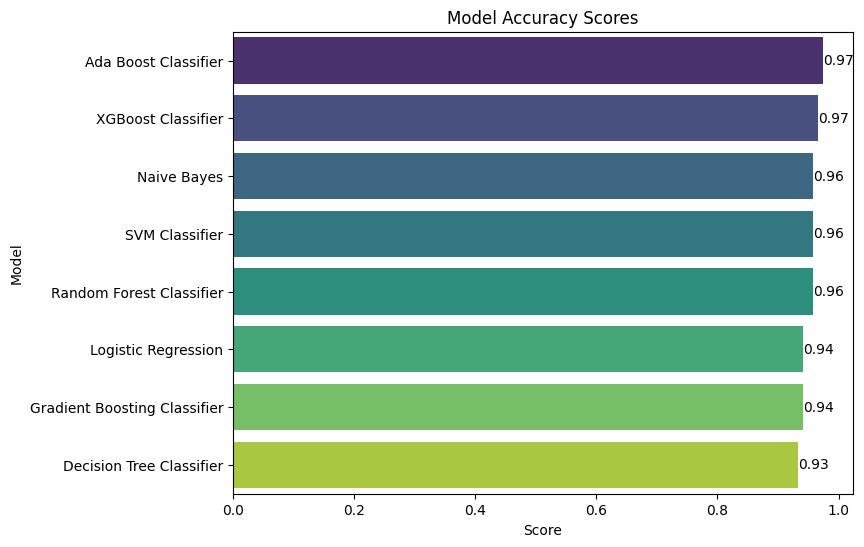

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the barplot 
plt.figure(figsize=(8,6))
ax = sns.barplot(x='Score', y='Model', data= models, palette='viridis')

# Add value labels on top of the bars
for p in ax.patches:
    # Get the position of each bar
    width = p.get_width()
    # Position the text in the middle of each bar
    ax.text(width , p.get_y() + p.get_height() / 2, 
            f'{width:.2f}', ha='left', va='center', fontsize=10)
    
plt.title("Model Accuracy Scores")
plt.show()

## Ada Boost Classifier and XGBoost Classifier are getting Highest Accuracy score